In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('zomato.csv')

In [3]:
df = pd.read_csv('zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<li>Total rows = 51717</li>
<li>Total columns = 17</li>

# Missing Values

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

<li>rate with 15% percentage of data missing, 7775 in count </li>
<li>phone with 2.33% percentage of data missing, 1208 in count</li>
<li>location with 0.04% percentage of data missing, 21 in count</li>
<li>rest_type with 0.43% percentage of data missing, 227 in count</li>
<li>dish_liked with 54.29% percentage of data missing, 28078 in count</li>
<li>cuisines with 0.087% percentage of data missing, 45 in count</li>
<li>approx_cost(for two people) with 0.66% percentage of data missing, 346 in count</li>

<h3>Handling Numerical Missing Values</h3>
<li>rate is a object type but we can convert it into numeric and perform some imputing if needed</li>
<li>approx_cost(for two people) needs some processing, then it we can use imputing</li>

We will convert rate into numeric feature by some data processing

In [8]:
df['rate'].dtype

dtype('O')

In [9]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [10]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [11]:
df['rate'].isnull().sum()

7775

In [12]:
def ratings(x):
    if x=='NEW':
        return x
    if type(x)==float:
        return x
    if x=='-':
        return x
    return float(x.split('/')[0])

In [13]:
df['rate'] = df['rate'].apply(ratings)

In [14]:
df['rate'].replace(['NEW','-'],np.nan,inplace=True)

In [15]:
df['rate'] = df['rate'].astype('float32')

In [16]:
df['rate'].isnull().sum()/len(df)*100

19.436548910416303

In [17]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [18]:
for i in range(len(df['approx_cost(for two people)'])):
    if type(df.loc[i,'approx_cost(for two people)'])==float:
        continue
    df.loc[i,'approx_cost(for two people)']=df.loc[i,'approx_cost(for two people)'].replace(',','')

In [19]:
df['approx_cost(for two people)'].isnull().sum()

346

In [20]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [21]:
df['approx_cost(for two people)'].fillna(int(df['approx_cost(for two people)'].mean()),inplace=True)

In [22]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('int32')

In [23]:
df['approx_cost(for two people)'].mean()

555.4286791577238

In [24]:
df['approx_cost(for two people)'].isnull().sum()

0

In [25]:
df.rename(columns={'approx_cost(for two people)':'cft'},inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51717 non-null  object 
 1   address          51717 non-null  object 
 2   name             51717 non-null  object 
 3   online_order     51717 non-null  object 
 4   book_table       51717 non-null  object 
 5   rate             51717 non-null  float32
 6   votes            51717 non-null  int64  
 7   phone            50509 non-null  object 
 8   location         51696 non-null  object 
 9   rest_type        51490 non-null  object 
 10  dish_liked       23639 non-null  object 
 11  cuisines         51672 non-null  object 
 12  cft              51717 non-null  int32  
 13  reviews_list     51717 non-null  object 
 14  menu_item        51717 non-null  object 
 15  listed_in(type)  51717 non-null  object 
 16  listed_in(city)  51717 non-null  object 
dtypes: float32(1

<h3>Handling Categorical Missing Values</h3>
<li>phone column can be dropped which is not used for analysis</li>
<li>dish_liked column is having 54% of missing values so we can drop it</li>
<li>we will use dropna for location and cuisines</li>
<li>we can replace missing values of rest_type with Casual Dining</li>

In [27]:
df.drop(columns=['phone','dish_liked'],inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51717 non-null  object 
 1   address          51717 non-null  object 
 2   name             51717 non-null  object 
 3   online_order     51717 non-null  object 
 4   book_table       51717 non-null  object 
 5   rate             51717 non-null  float32
 6   votes            51717 non-null  int64  
 7   location         51696 non-null  object 
 8   rest_type        51490 non-null  object 
 9   cuisines         51672 non-null  object 
 10  cft              51717 non-null  int32  
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
dtypes: float32(1), int32(1), int64(1), object(12)
memory usage: 5.5+ MB


In [29]:
df.duplicated().any()

False

In [30]:
df[df['rest_type'].isna()][['name','cuisines']]

,name,cuisines
999,Mughlai Kitchen,"Mughlai, North Indian, Chinese, Momos"
1300,Eat & Joy Restaurant,"Fast Food, Finger Food"
1376,Kababish Restaurant,"North Indian, Chinese, Arabian"
1565,Goli Vada Pav No 1,"Street Food, Burger"
1637,Ammi's Biryani,"Biryani, North Indian"
...,...,...
50978,Snack Itt,Bakery
51130,Pindi Bangalore,"North Indian, Chinese, Biryani, Street Food"
51195,Special Biryani House,"North Indian, Biryani, Chinese"
51294,Red Roost,"North Indian, South Indian"


In [31]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

We can replace the null values in rest_type with the Casual_Dining

In [32]:
df['rest_type'].fillna('Casual Dining',inplace=True)

In [33]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
location           21
rest_type           0
cuisines           45
cft                 0
reviews_list        0
menu_item           0
listed_in(type)     0
listed_in(city)     0
dtype: int64

In [34]:
df.dropna(subset=['cuisines'],inplace=True)

In [35]:
df.dropna(subset=['location'],inplace=True)

In [188]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cft,reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [37]:
len(df)/len(df1)*100

99.91298799234293

In [60]:
s=0
for i in df['menu_item']:
    if len(i)==2:
        s+=1
print(s/len(df)*100)

76.59273881405791


menu_item feature will be dropped because 76% of data is not given for that feature

In [61]:
df.drop(columns=['menu_item'],inplace=True,axis=1)

In [63]:
s=0
for i in df['reviews_list']:
    if len(i)==2:
        s+=1
print(s/len(df)*100)

14.640424214274656


In [62]:
df.isnull().sum()

url                0
address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
cft                0
reviews_list       0
listed_in(type)    0
listed_in(city)    0
dtype: int64

# EDA

In [456]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cft,reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Top 10 Restaurants with highest votes

In [465]:
df['votes'].nlargest(50).unique()

array([16832, 16345, 14956, 14726, 14723, 14717, 14710, 14704, 14694,
       14690, 14654, 12121, 10550, 10547, 10541, 10530, 10512, 10503,
       10471, 10422, 10413,  9300,  9272,  9085,  9084,  9080],
      dtype=int64)

In [448]:
list(df.groupby('votes').first().sort_values(by='votes',ascending=False)['name'].head(50).unique())

['Byg Brewski Brewing Company',
 'Toit',
 'Truffles',
 "AB's - Absolute Barbecues",
 'The Black Pearl',
 'Big Pitcher',
 'Onesta',
 'Arbor Brewing Company',
 'Empire Restaurant',
 'Prost Brew Pub',
 'Church Street Social']

# Online Orders and Book Table availability

In [125]:
# Online only
online = df.online_order.value_counts().loc['Yes']- df[(df['online_order']=='Yes') & (df['book_table']=='Yes')].book_table.value_counts().loc['Yes']

In [126]:
# Book only
book = df.book_table.value_counts().loc['Yes']- df[(df['online_order']=='Yes') & (df['book_table']=='Yes')].online_order.value_counts().loc['Yes']

In [127]:
# Both online and book
both = df[(df['online_order']=='Yes') & (df['book_table']=='Yes')].book_table.value_counts().loc['Yes']

In [131]:
# Not online and book
not_both = df[(df['online_order']=='No') & (df['book_table']=='No')].book_table.value_counts().loc['No']

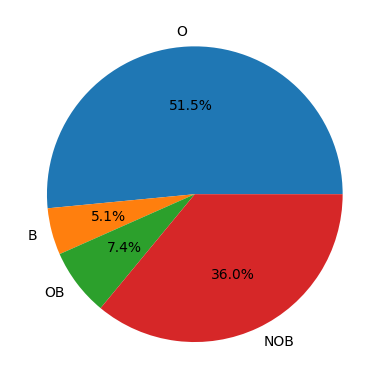

In [136]:
plt.pie([online,book,both,not_both],labels=['O','B','OB','NOB'],autopct='%.1f%%')
plt.show()

# Most list_in(type)

In [147]:
v = list(df['listed_in(type)'].value_counts().unique())

In [165]:
k = list(df['listed_in(type)'].value_counts().index)

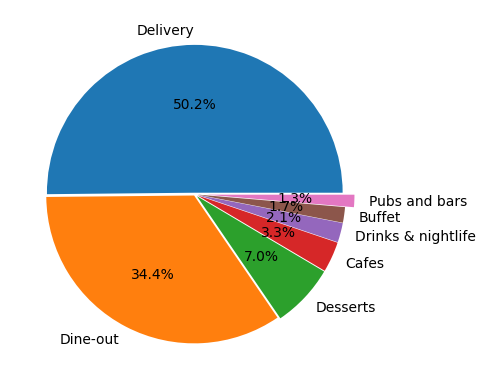

In [175]:
plt.pie(v,labels=k,autopct='%.1f%%',explode=(.01,.01,.02,.02,.02,.02,.08))
plt.show()

In [178]:
len(df[df['listed_in(city)']==df['location']])

16010

# Is Rating is directly proportional to Votes?

<Axes: xlabel='rate', ylabel='votes'>

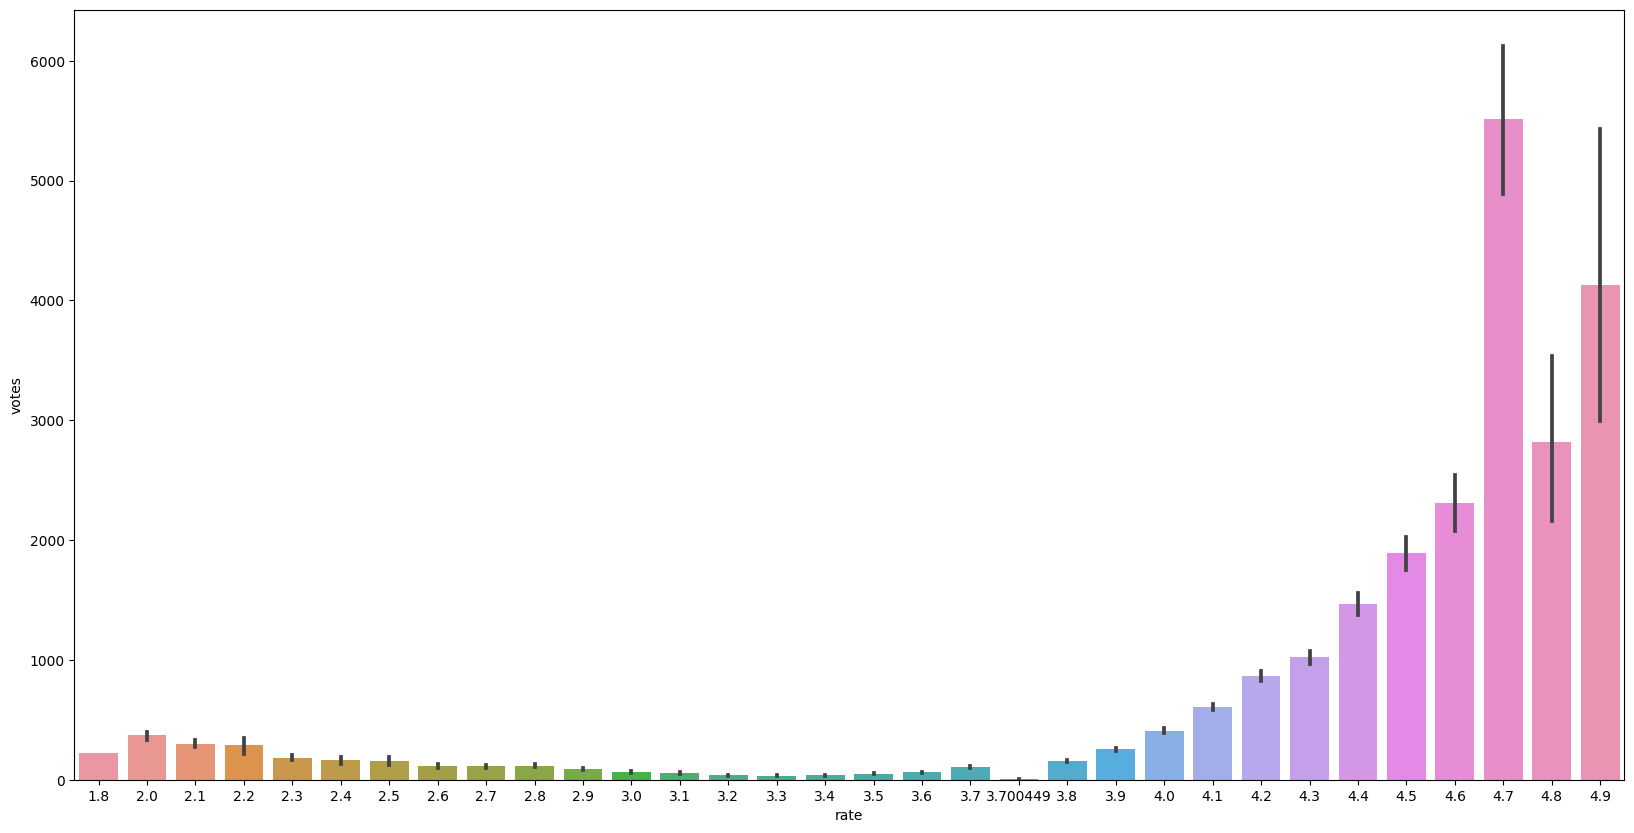

In [196]:
plt.figure(figsize=(20,10))
sns.barplot(x='rate',y='votes',data=df)

We can say mostly the rating is higher when the votes are higher and vice versa

In [197]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cft,reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


# Which location is best to open a restaurant?

In [485]:
df['location'].value_counts().head(10)

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Indiranagar              2081
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1630
Bellandur                1286
Name: location, dtype: int64

The location of Top 10 mosted visited restaurants are best open a new restaurant

# Top 10 single cuisines (Best single cuisines)

In [376]:
l=[]
s={}
for i in df['cuisines']:
    for j in i.split(','):
        j=j.strip()
        if j not in l:
            l.append(j)

In [377]:
len(l)

107

In [378]:
d=dict()
for i in df['cuisines']:
    for j in i.split(','):
        j=j.strip()
        d[j]=0

In [379]:
for i in df['cuisines']:
    for j in i.split(','):
        j=j.strip()
        d[j]+=1

In [380]:
len(d)

107

In [381]:
d1 = {
    'Name':d.keys(),
    'Counts':d.values()
}

In [382]:
d2 = pd.DataFrame(d1)

In [383]:
d1 = d2.sort_values(by='Counts',ascending=False).head(10)

In [384]:
popular_c = d1['Name']

In [385]:
d1

,Name,Counts
0,North Indian,21085
2,Chinese,15547
7,South Indian,8644
14,Fast Food,8096
21,Biryani,6492
11,Continental,5765
20,Desserts,5633
4,Cafe,5303
13,Beverages,4747
6,Italian,3389


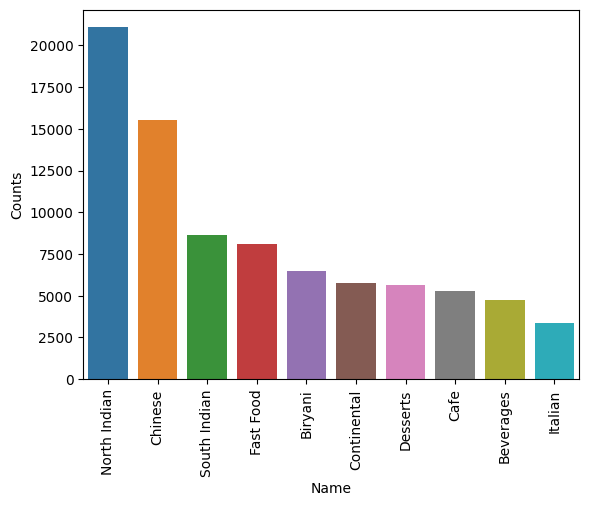

In [279]:
sns.barplot(x='Name',y='Counts',data=d1)
plt.xticks(rotation='vertical')
plt.show()

# Which system got most rating greater than 4 Online or Booking?

In [280]:
len(df[(df['online_order']=='Yes') & (df['rate']>=4.0)])

8372

In [281]:
len(df[(df['book_table']=='Yes') & (df['rate']>=4.0)])

4918

Online_order system got more rating greater than 4

# Which location have most online orders and which location have most book_table?

In [368]:
len(df[df['online_order']=='Yes'])

30428

In [291]:
l = list(df['location'].unique())

In [292]:
d={}
for i in l:
    d[i]=0

In [351]:
s=0
for i in range(len(df)):
    k=df.iloc[i,7]
    y=df.iloc[i,3]
    if y=='Yes' and k in d.keys():
        d[k]+=1
    

In [358]:
d1={
    'Location':d.keys(),
    'Counts':d.values()
}
d2 = pd.DataFrame(d1)

In [359]:
d3 = d2.sort_values(by='Counts',ascending=False).head(10)

In [367]:
sum(d2['Counts'])

30438

In [360]:
d3

,Location,Counts
13,BTM,3332
18,HSR,1920
23,Koramangala 5th Block,1614
3,Jayanagar,1365
33,Indiranagar,1335
8,JP Nagar,1319
30,Whitefield,1133
19,Marathahalli,1109
12,Bannerghatta Road,924
34,Koramangala 1st Block,853


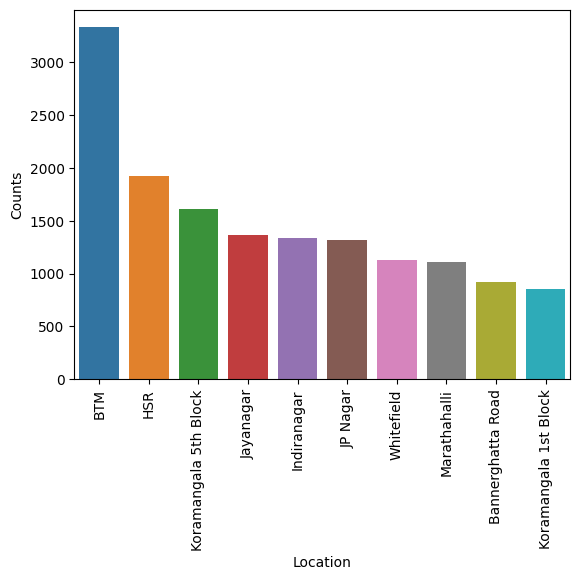

In [361]:
sns.barplot(x='Location',y='Counts',data=d3)
plt.xticks(rotation='vertical')
plt.show()

# Most visited rest_type

In [370]:
df['rest_type'].value_counts().head(10)

Quick Bites           19129
Casual Dining         10532
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           865
Bar                     697
Name: rest_type, dtype: int64

# Which city has all popular cuisines?

In [387]:
popular_c = list(popular_c)

In [394]:
popular_c =popular_c[:5]

In [388]:
l = list(df['listed_in(city)'].unique())

In [431]:
d={}
d1={}
for i in popular_c:
    d1[i]=0
for i in l:
    d[i]=d1

In [433]:
s=0
for i in range(len(df)):
    k=df.iloc[i,13]
    y=df.iloc[i,9].split(',')
    for i in range(len(y)):
        y[i]=y[i].strip()
    for j in y:
        if j in d1.keys():
            d[k][j]+=1
    

In [435]:
len(l),len(d)

(30, 30)

All locations have the most popular cuisines in their restaurant

In [441]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cft,reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


## changing something